# Demonstration of figure finder

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from figure_finder.figure_saver import FigureSaver
fig_saver = FigureSaver(
    name='example_figure_saver',    # Name of output file
    path='.',                       # Path to output file 
    
    # if they already exists overwrite figures?
    fig_ow = 'ow',  # Sets the default              
    
    # Save figures? 
    save_mode       = True,         
    # Different formats to save...    
    # Set the defaults at the beginning of the file
    # Here only saving svg files 
    save_svg        = True,         # svg  
    save_png        = False,        # png
    save_pdf        = False,        # pdf (most compatible format for adobe...)
    
    # If the folder already exists, delete and remake it?
    folder_ow       = True,         
)

# If you want to rerun notebook, but make some small changes you can 
# change the name = 'example_figure_saver_v001' 
# I find this a useful (albeit hacky) way to track versions

FOLDER ALREADY EXISTS!
Deleting and remaking folder


if you just want to run the folder without saving anything (i.e., you are just testing)

set "save_mode = False"


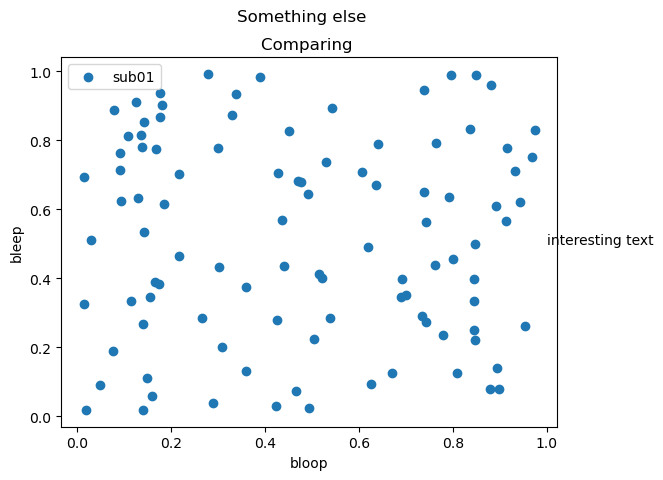

Inserting info into svg file


In [3]:
# Lets add a random plot

x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')
plt.show()
fig_saver.add_img(
    fig=fig, 
    fig_name='figure_v1',
)

# by default figure is saved in example_figure_saver/
# as a .svg file (see save_*=  options in cell above)
# To save other formats specify save_ options
fig_saver.add_img(
    fig=fig, 
    fig_name='figure_v1',
    save_png=True, # also save a png
)


# We can also add context to the file metadata 
# Also creates a version with *_context* with text added to figure itself
fig_saver.add_img(
    fig=fig, 
    fig_name='figure_v2',
    context_note = 'hello here is some context',
)


# We can specify the subfolder to put the figure into
fig_saver.add_img(
    fig=fig, 
    fig_name='figure_v3',
    sub_folder='subfolder',
)


If you've saved the svg with the code, you can see the extra information is embedded in to the svg file, as meta data...

Now check open the SVG file using a text editor - you should be able to see all the extra information has been added
Look under 

*********** START - info inserted by figure finder ********

The text file also contains the code from the cell which made this figure

In [5]:
# Now lets save another figure.

# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')
fig_saver.add_img(
    fig=fig, 
    fig_name='blah_figure_2',
)

# Again we save the figure...


In [60]:
# Note - if we find a matching figure with the same name; it can either overwrite, skip, or write a copy with the date appended
# fig_ow = 'ow' or 'skip' or 'date'

# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')
fig_saver.add_img(
    fig=fig, 
    fig_name='blah_figure_2',
    fig_ow='ow', # skip? ow? date?
)


#### other useful features


In [61]:
# subfolders
fig_saver.add_img(
    fig=fig, 
    sub_folder='blah', # put everything inside the subfolder            
)


In [62]:
# automatically get the name, if not specified
# will look at suptitle, and titles... 
fig_saver.add_img(
    fig=fig,     
)


In [63]:
# specify save options
fig_saver.add_img(
    fig=fig,     
    save_svg=False, # ignore the initial preferences
    save_png=True, 
)


add context note 

sometimes you may want to add a note about how the figure was made (different parameters etc); and store that note with the image. But you don't want it to get in the way. A context note will do this by making a copy of the figure, with the context added as text

In [64]:
fig_saver.add_img(
    fig=fig,     
    fig_name='blah',
    context_note='here is some context hello'
)

Inserting info into svg file


# Save the code 

In [ ]:
# So you ran everyting
from figure_finder.utils import save_running_code
save_running_code(output_folder=fig_saver.path)